In [60]:
#Importing the libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [61]:
# Importing the dataset
path = os.getcwd()
path = path + "\\star_classification.csv"

dataset = pd.read_csv(path)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [62]:
# Changing class from string to int
dataset['class'] = [1 if i == "GALAXY" else 2 if i == "STAR" else 3 for i in dataset["class"]]
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


In [63]:
# Count of each class
class_counts = dataset["class"].value_counts()
print(class_counts)

class
1    59445
2    21594
3    18961
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_18656\4053954700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=dataset, palette="Set2")


<Axes: xlabel='class', ylabel='count'>

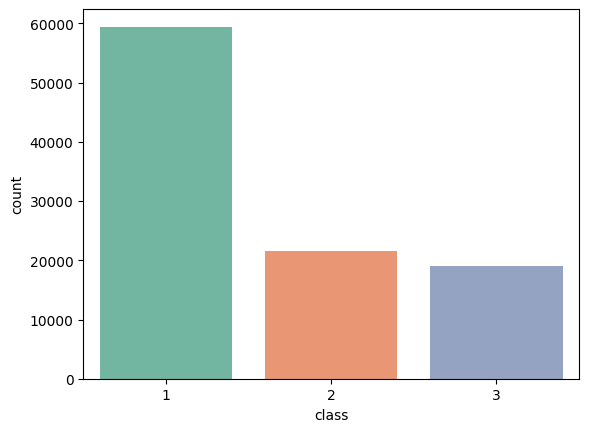

In [64]:
# Plotting the count of each class
sns.countplot(x="class", data=dataset, palette="Set2")

In [65]:
# Detecting outliers
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(dataset) 

In [66]:
# Calculate the outlier scores
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

In [67]:
# Calculate the mean and standard deviation of the LOF scores
mean = np.mean(clf.negative_outlier_factor_)
std = np.std(clf.negative_outlier_factor_)

# Define the threshold for outliers
threshold = mean - 0.5 * std
threshold = -1.5

# Detect outliers
outliers = dataset[clf.negative_outlier_factor_ < threshold]

In [68]:
#Drop outliers
dataset = dataset.drop(outliers.index)

In [69]:
# Calculate the threshold
#threshold = np.percentile(clf.negative_outlier_factor_, 10)

# Detect outliers
#outliers2 = dataset[clf.negative_outlier_factor_ < threshold]

In [70]:
#from scipy.spatial import distance
# Calculate the mean and covariance of the dataset
#mean = np.mean(dataset, axis=0)
#cov = np.cov(dataset, rowvar=0)

# Calculate the Mahalanobis distance of each point
#mahalanobis_dist = np.apply_along_axis(lambda x: distance.mahalanobis(x, mean, np.linalg.inv(cov)), 1, dataset)

# Define the threshold for outliers
#threshold = np.mean(mahalanobis_dist) * 2  # For example, two times the mean

# Detect outliers
#outliers = dataset[mahalanobis_dist > threshold]

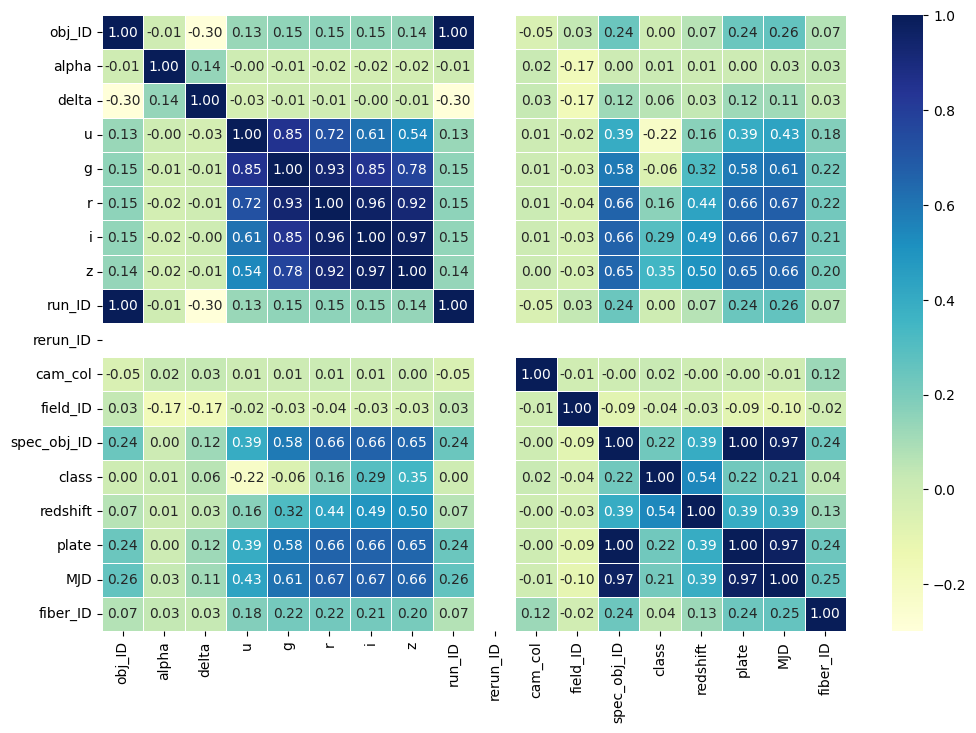

In [71]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [72]:
print(dataset["spec_obj_ID"].nunique())
print(len(dataset["obj_ID"]))

84744
84744


In [73]:
correlation = dataset.corr()
correlation["class"].sort_values(ascending=False)

class          1.000000
redshift       0.541667
z              0.349711
i              0.294075
plate          0.224718
spec_obj_ID    0.224718
MJD            0.214433
r              0.160654
delta          0.058947
fiber_ID       0.037319
cam_col        0.017789
alpha          0.008187
obj_ID         0.000252
run_ID         0.000250
field_ID      -0.037542
g             -0.058192
u             -0.222802
rerun_ID            NaN
Name: class, dtype: float64

In [74]:
# Dropping uneccessary features
dataset = dataset.drop(["rerun_ID"], axis=1)
dataset.info()

#dataset3 = dataset2.drop(["MJD","spec_obj_ID","i","r",""], axis=1)
#dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84744 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       84744 non-null  float64
 1   alpha        84744 non-null  float64
 2   delta        84744 non-null  float64
 3   u            84744 non-null  float64
 4   g            84744 non-null  float64
 5   r            84744 non-null  float64
 6   i            84744 non-null  float64
 7   z            84744 non-null  float64
 8   run_ID       84744 non-null  int64  
 9   cam_col      84744 non-null  int64  
 10  field_ID     84744 non-null  int64  
 11  spec_obj_ID  84744 non-null  float64
 12  class        84744 non-null  int64  
 13  redshift     84744 non-null  float64
 14  plate        84744 non-null  int64  
 15  MJD          84744 non-null  int64  
 16  fiber_ID     84744 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 11.6 MB


In [75]:
dataset2 = dataset.drop(["obj_ID","run_ID","field_ID","fiber_ID","cam_col"], axis=1)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84744 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alpha        84744 non-null  float64
 1   delta        84744 non-null  float64
 2   u            84744 non-null  float64
 3   g            84744 non-null  float64
 4   r            84744 non-null  float64
 5   i            84744 non-null  float64
 6   z            84744 non-null  float64
 7   spec_obj_ID  84744 non-null  float64
 8   class        84744 non-null  int64  
 9   redshift     84744 non-null  float64
 10  plate        84744 non-null  int64  
 11  MJD          84744 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 8.4 MB


In [76]:
dataset3 = dataset2.drop(["alpha", "delta"], axis=1)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84744 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            84744 non-null  float64
 1   g            84744 non-null  float64
 2   r            84744 non-null  float64
 3   i            84744 non-null  float64
 4   z            84744 non-null  float64
 5   spec_obj_ID  84744 non-null  float64
 6   class        84744 non-null  int64  
 7   redshift     84744 non-null  float64
 8   plate        84744 non-null  int64  
 9   MJD          84744 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 7.1 MB


In [77]:
# spec_obj_ID stays since it is unique for each spectral object
dataset4 = dataset3.drop(["plate","MJD"], axis=1)
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84744 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            84744 non-null  float64
 1   g            84744 non-null  float64
 2   r            84744 non-null  float64
 3   i            84744 non-null  float64
 4   z            84744 non-null  float64
 5   spec_obj_ID  84744 non-null  float64
 6   class        84744 non-null  int64  
 7   redshift     84744 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 5.8 MB


In [78]:
# Deal with imbalanced data
X = dataset4.drop(["class"], axis=1)
y = dataset4['class']

sm = SMOTE(random_state=42)             # random_state for reproducibility
print('Original dataset shape %s' % Counter(y))
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))


Original dataset shape Counter({1: 50695, 2: 17890, 3: 16159})


Resampled dataset shape Counter({1: 50695, 3: 50695, 2: 50695})


C:\Users\pc\AppData\Local\Temp\ipykernel_18656\1239767217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


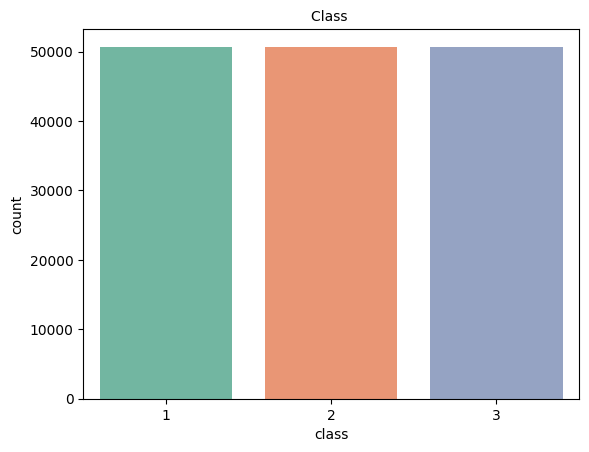

In [79]:
sns.countplot(x=y, palette="Set2")
plt.title("Class ",fontsize=10)
plt.show()

In [80]:
# Feature Scaling
sc = StandardScaler()
X1 = sc.fit_transform(X)


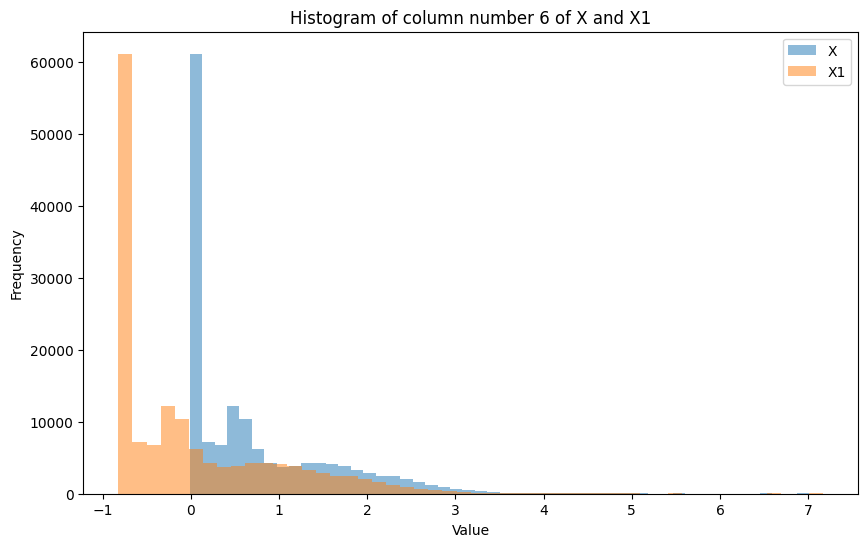

In [81]:
# Checking if data's shape is still the same (which it should be)
column = 6


plt.figure(figsize=(10, 6))
plt.hist(X.iloc[:, column], bins=50, label='X', alpha=0.5)
plt.hist(X1[:, column], bins=50, label='X1', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of column number ' + str(column) + ' of X and X1')
plt.legend()
plt.show()

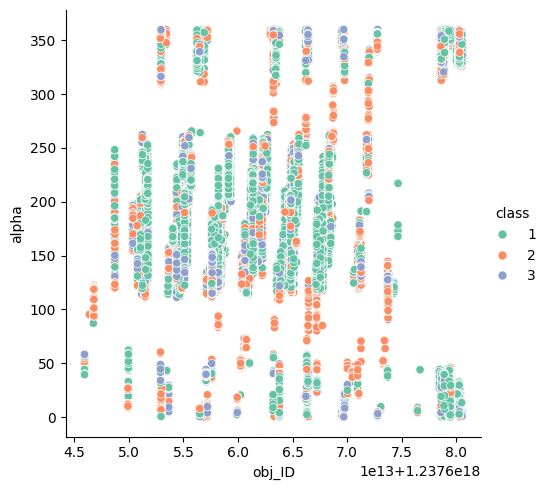

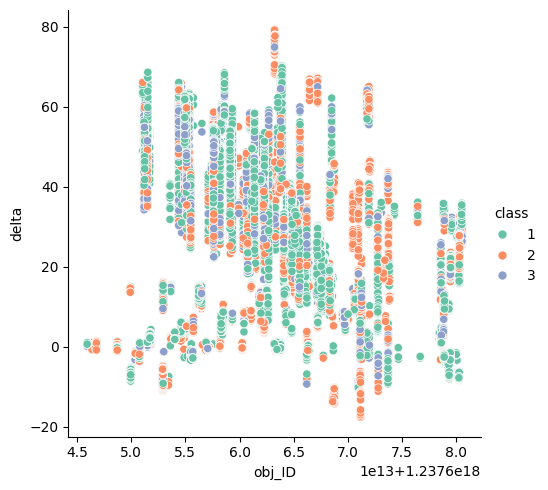

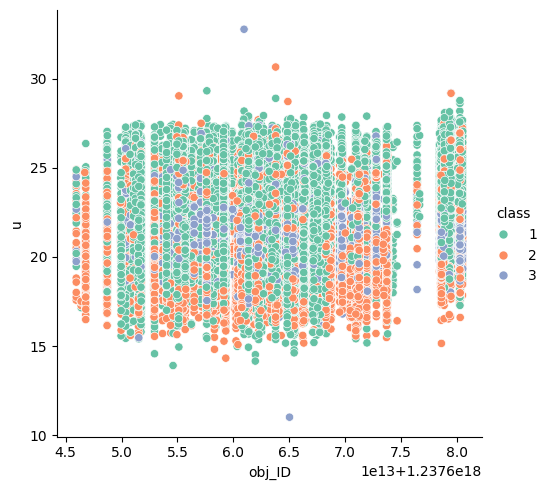

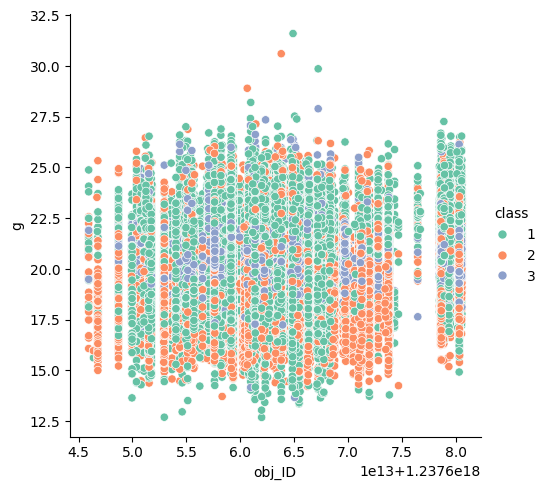

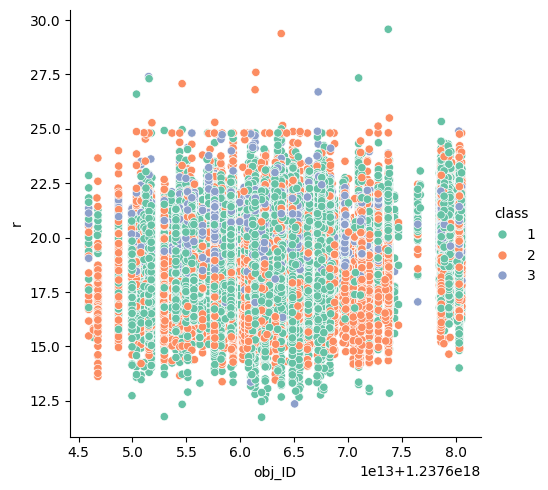

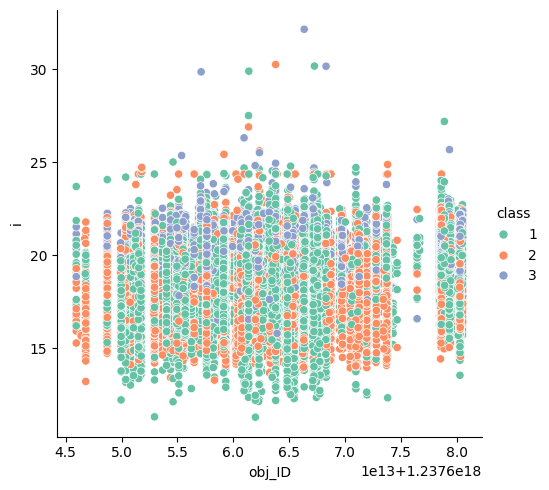

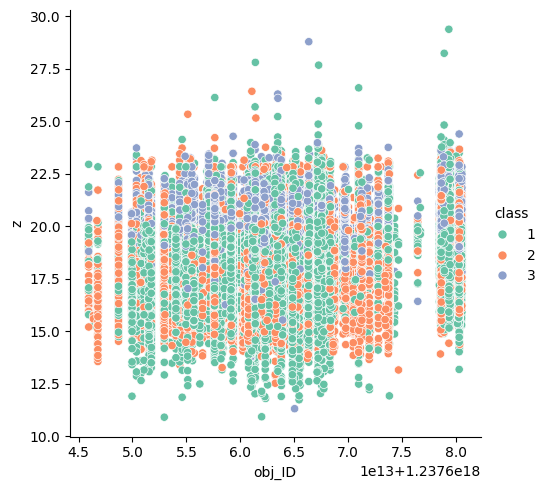

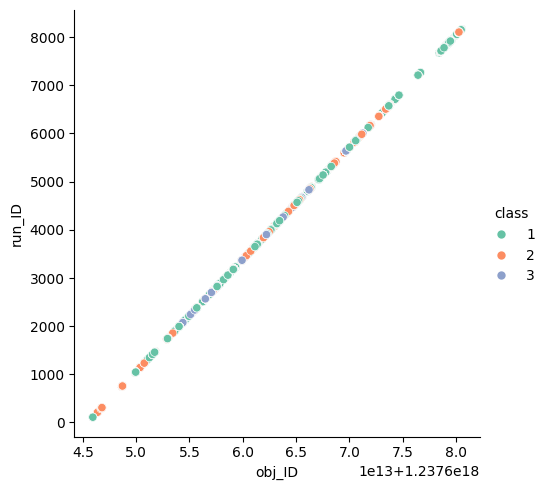

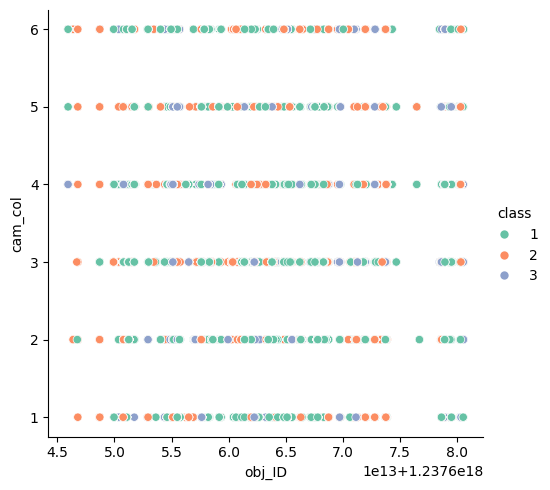

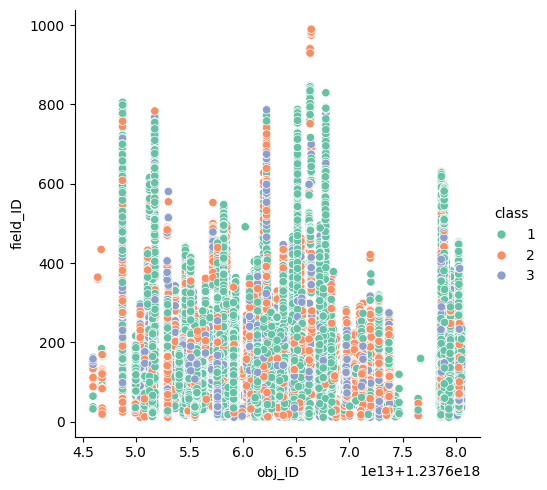

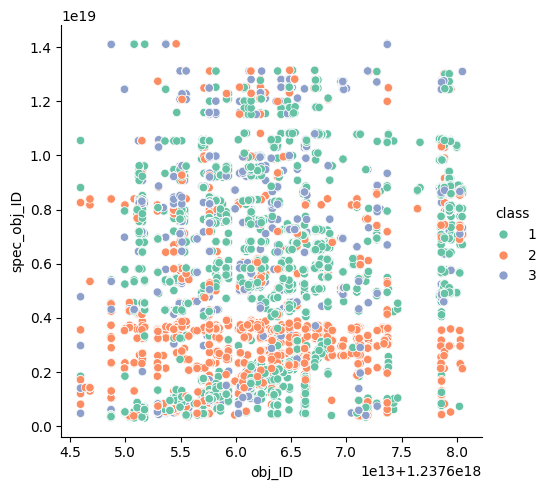

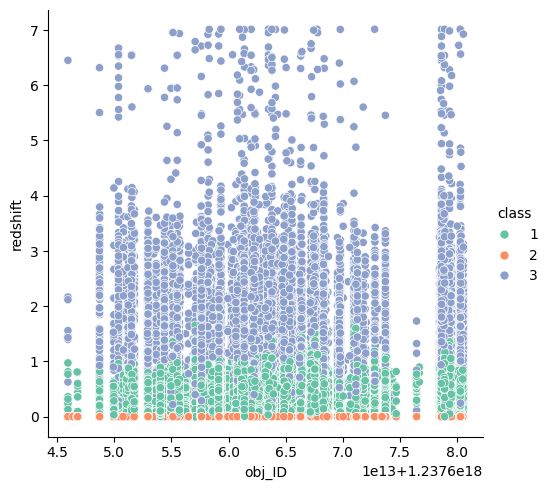

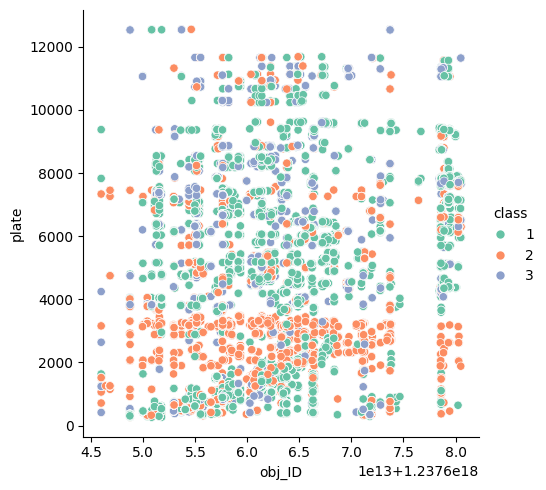

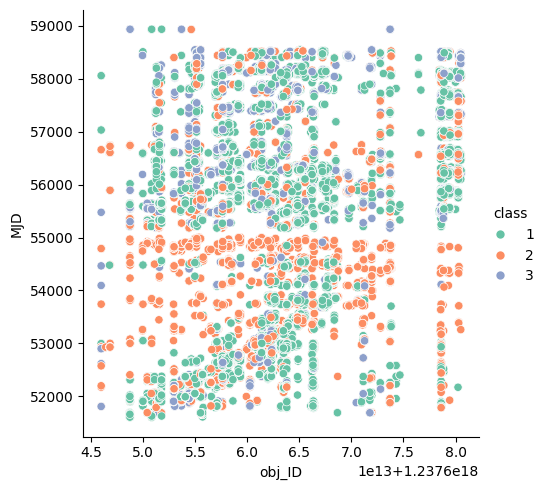

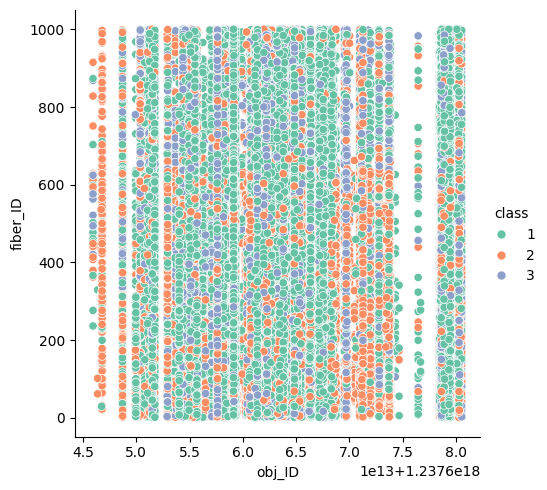

In [82]:
#comparing variations of different attributes with 'obj_ID'
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
         'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=dataset,x='obj_ID', y=i, hue='class', palette='Set2')
    plots.append(g)

In [101]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

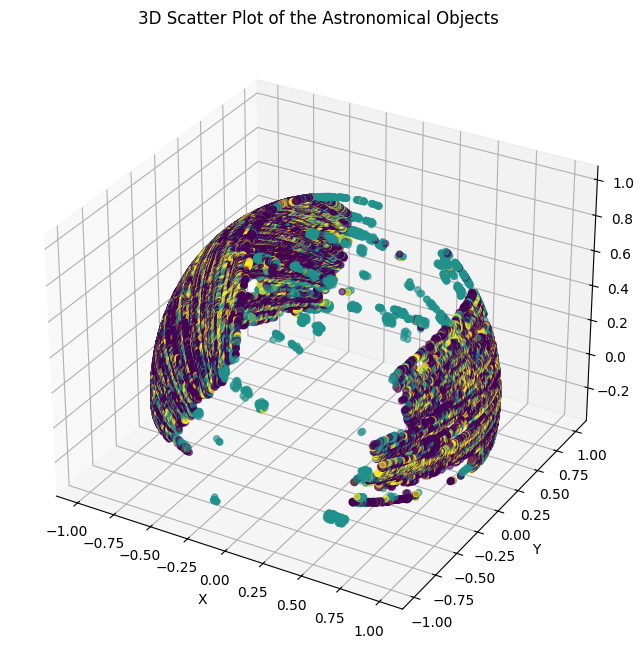

In [102]:
# plot the astronomical objects on the celestial sphere

from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
import astropy.units as u

# Gerar dados de exemplo
ra = dataset["alpha"].tolist()
dec = dataset["delta"].tolist()
labels = dataset["class"].tolist()

# Converter coordenadas para objeto SkyCoord
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')

# Converter coordenadas esféricas para cartesianas
x_c = np.cos(coords.ra.rad) * np.cos(coords.dec.rad)
y_c = np.sin(coords.ra.rad) * np.cos(coords.dec.rad)
z_c = np.sin(coords.dec.rad)

# Plotar na esfera celeste em 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_c, y_c, z_c, c=labels, cmap=plt.get_cmap('viridis'), s=20, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of the Astronomical Objects')

plt.show()

1. Logistic Regression

1.1 Lasso Penalty

In [103]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='l1')
logreg_model.fit(X_train, y_train)

# Now you can predict on your test data
y_pred = logreg_model.predict(X_test)

In [104]:
# Counting the occurences of each class in the test set
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{1: 9977, 2: 10244, 3: 10196}


In [105]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1: 0.96
Classification report:
              precision    recall  f1-score   support

           1       0.94      0.95      0.95      9977
           2       0.99      1.00      0.99     10244
           3       0.97      0.94      0.95     10196

    accuracy                           0.96     30417
   macro avg       0.96      0.96      0.96     30417
weighted avg       0.97      0.96      0.96     30417



In [106]:
# Count the occurrences of each class in the predictions
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{1: 10140, 2: 10392, 3: 9885}


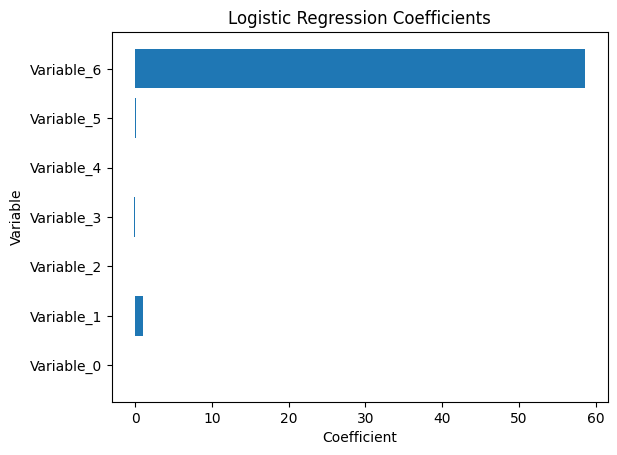

In [107]:
# Obtain the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
variable_names = ['Variable_{}'.format(i) for i in range(len(coefficients))]

# Create a bar plot of the coefficients
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Logistic Regression Coefficients')
plt.show()

1.2 Ridge Penalty

In [108]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='l2')
logreg_model.fit(X_train, y_train)

# Now you can predict on your test data
y_pred = logreg_model.predict(X_test)

In [109]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1: 0.96
Classification report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      9977
           2       0.97      1.00      0.99     10244
           3       0.97      0.94      0.95     10196

    accuracy                           0.96     30417
   macro avg       0.96      0.96      0.96     30417
weighted avg       0.96      0.96      0.96     30417



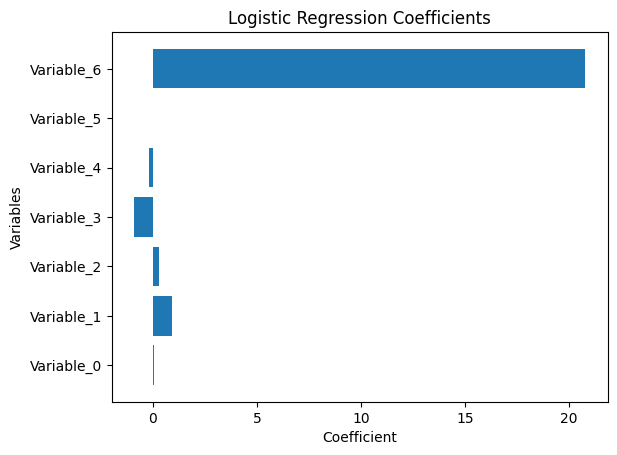

In [110]:
# Obtain the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
variable_names = ['Variable_{}'.format(i) for i in range(len(coefficients))]

# Create a bar plot of the coefficients
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

1.3 Mix Penalty

In [111]:
l1_ratios = [0, 0.001, 0.002, 0.005, 0.01, 0.1, 0.5, 0.9, 0.95, 0.99, 1]
max_f1 = 0
best_l1_ratio = 0

for l1_ratio in l1_ratios:
    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=l1_ratio)
    logreg_model.fit(X_train, y_train)

    # Now you can predict on your test data
    y_pred = logreg_model.predict(X_test)

    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    if f1 > max_f1:
        max_f1 = f1
        best_l1_ratio = l1_ratio

In [112]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=best_l1_ratio)
logreg_model.fit(X_train, y_train)

# Now you can predict on your test data
y_pred = logreg_model.predict(X_test)

In [113]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1: 0.96
Classification report:
              precision    recall  f1-score   support

           1       0.94      0.95      0.95      9977
           2       0.99      1.00      0.99     10244
           3       0.97      0.94      0.95     10196

    accuracy                           0.96     30417
   macro avg       0.96      0.96      0.96     30417
weighted avg       0.97      0.96      0.96     30417



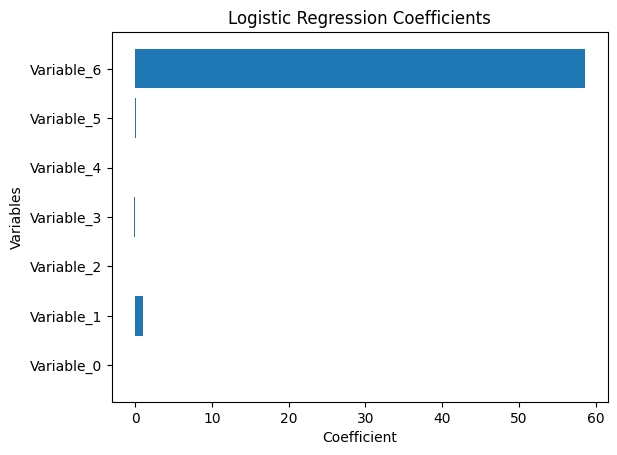

In [114]:
# Obtain the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
variable_names = ['Variable_{}'.format(i) for i in range(len(coefficients))]

# Create a bar plot of the coefficients
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Variables')
plt.title('Logistic Regression Coefficients')
plt.show()